# Translation (Phép tịnh tiến)
* Code sách:

In [70]:
from google.colab.patches import cv2_imshow
import numpy as np
import argparse
import imutils
import cv2

def translate(image, x, y):
 M = np.float32([[1, 0, x], [0, 1, y]])
 shifted = cv2.warpAffine(image, M, (image.shape[1],
                                     image.shape[0]))
 return shifted


Shifted Down


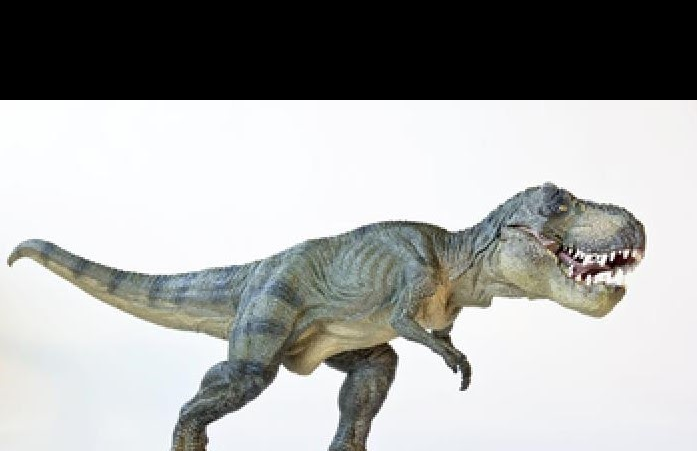

-1

In [71]:
image =  cv2.imread('trex.png')

shifted = imutils.translate(image, 0, 100)
print("Shifted Down")
cv2_imshow(shifted)
cv2.waitKey(0)

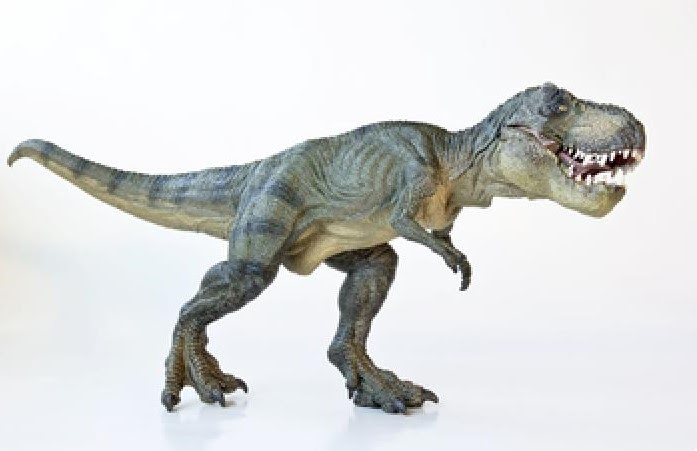

In [72]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('trex.jpg')
height = image.shape[0]
width = image.shape[1]
cv2_imshow(image)

## Code ma trận: 
* M =[[1 0 Bx ],[0 1 By],[0 0 1]]

* K = [x y 1]

* K' = [[1 0 Bx ],[0 1 By],[0 0 1]] [x y 1] = [x+Bx y+By 1]

In [73]:
#Hàm Translate sự dụng kiến thức về ma trận 
def translation(image,p,q):
  #Tạo ma trận lưới các điểm trong ảnh giá trụ từ (-1:1) gốc tọa độ là tâm của ảnh
  x = np.linspace(-1, 1, width)
  y = np.linspace(-1, 1, height)
  xx, yy = np.meshgrid(x, y)
  #Thêm điểm 1 vào tất cả các điểm  
  K = np.vstack([xx.flatten(), yy.flatten(), np.ones_like(xx.flatten())])
  #Tạo ma trận scale :
  M = np.asarray([[1,0,p],[0,1,q]])
  #Ta thực hiện phép nhân ma trận M và K. Sau đó resize về cùng với kích thước ảnh ban đầu
  K_phay = M @ K
  K_phay = K_phay.reshape(2, height, width)
  K_phay = np.moveaxis(K_phay, 0, -1)
  #Chuyển về gốc tọa độ về góc trên bên trái của ảnh
  x_transformed = K_phay[:,:,0:1].squeeze()
  y_transformed = K_phay[:,:,1:2].squeeze()
  x = ((x_transformed + 1.) * width) * 0.5 
  y = ((y_transformed + 1.) * height) * 0.5
  #Tìm kiếm 4 điểm xung quanh để chuẩn bị thực hiện nội suy song tuyến tham chiếu công thức tính P nội suy song tuyến.
  x0 = np.floor(x).astype(np.int64)
  x1 = x0 + 1
  y0 = np.floor(y).astype(np.int64)
  y1 = y0 + 1
  x0 = np.clip(x0, 0, width-1)
  x1 = np.clip(x1, 0, width-1)
  y0 = np.clip(y0, 0, height-1)
  y1 = np.clip(y1, 0, height-1)
  x = np.clip(x, 0, width-1)
  y = np.clip(y, 0, height-1)
  #Lấy giá trị pixel của 4 điểm
  Q1 = image[y0, x0]
  Q2 = image[y1, x0]
  Q3 = image[y0, x1]
  Q4 = image[y1, x1]

  # lấy index theo công thức
  wa = (x1-x) * (y1-y)
  wb = (x1-x) * (y-y0)
  wc = (x-x0) * (y1-y)
  wd = (x-x0) * (y-y0)

  wa = np.expand_dims(wa, axis=2)
  wb = np.expand_dims(wb, axis=2)
  wc = np.expand_dims(wc, axis=2)
  wd = np.expand_dims(wd, axis=2)

  # thực hiện biến đổi song tuyến
  p = np.asarray(wa*Q1 + wb*Q2 + wc*Q3 + wd*Q4, dtype=np.uint8)
  return p


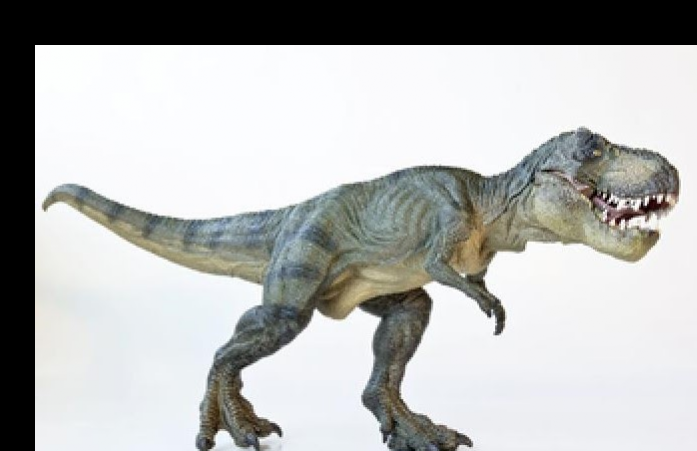

In [74]:
translated_1 = translation(image,-0.1,-0.2)
cv2_imshow(translated_1)

# Rotation (Phép xoay)
* Code sách:

In [75]:
import numpy as np
import argparse
import imutils
import cv2

def rotate(image, angle, center = None, scale = 1.0):
 (h, w) = image.shape[:2]

 if center is None:
   center = (w // 2, h // 2)

 M = cv2.getRotationMatrix2D(center, angle, scale)
 rotated = cv2.warpAffine(image, M, (w, h))
 return rotated


Rotated by 180 Degrees


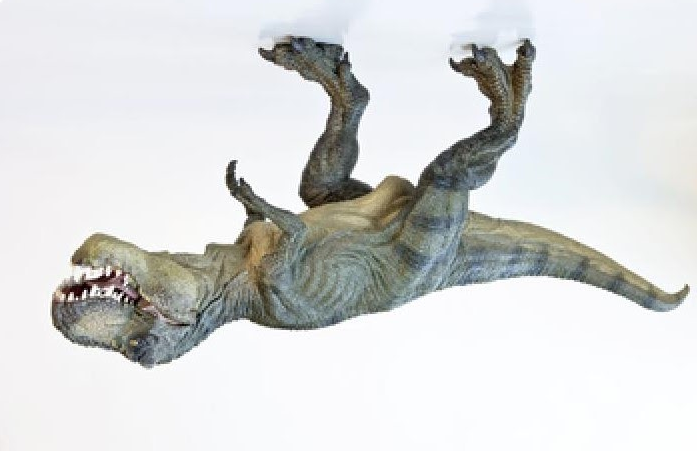

-1

In [76]:
image =  cv2.imread('trex.png')

rotated = imutils.rotate(image, 180)
print("Rotated by 180 Degrees")
cv2_imshow(rotated)
cv2.waitKey(0)



* Code ma trận:

In [77]:
#Hàm Rotation sự dụng kiến thức về ma trận 
def rotation(image,angle):
  #Tạo ma trận lưới các điểm trong ảnh giá trụ từ (-1:1) gốc tọa độ là tâm của ảnh
  x = np.linspace(-1, 1, width)
  y = np.linspace(-1, 1, height)
  xx, yy = np.meshgrid(x, y)
  #Thêm điểm 1 vào tất cả các điểm  
  K = np.vstack([xx.flatten(), yy.flatten(), np.ones_like(xx.flatten())])
  #Tạo ma trận xoay 1 góc angle độ :
  M = np.asarray([[np.cos(angle*np.pi/180), -np.sin(angle*np.pi/180), 0], [np.sin(angle*np.pi/180), np.cos(angle*np.pi/180),0]])
  #Ta thực hiện phép nhân ma trận M và K. Sau đó resize về cùng với kích thước ảnh ban đầu
  K_phay = M @ K
  K_phay = K_phay.reshape(2, height, width)
  K_phay = np.moveaxis(K_phay, 0, -1)
  #Chuyển về gốc tọa độ về góc trên bên trái của ảnh
  x_transformed = K_phay[:,:,0:1].squeeze()
  y_transformed = K_phay[:,:,1:2].squeeze()
  x = ((x_transformed + 1.) * width) * 0.5 
  y = ((y_transformed + 1.) * height) * 0.5
  #Tìm kiếm 4 điểm xung quanh để chuẩn bị thực hiện nội suy song tuyến tham chiếu công thức tính P nội suy song tuyến.
  x0 = np.floor(x).astype(np.int64)
  x1 = x0 + 1
  y0 = np.floor(y).astype(np.int64)
  y1 = y0 + 1
  x0 = np.clip(x0, 0, width-1)
  x1 = np.clip(x1, 0, width-1)
  y0 = np.clip(y0, 0, height-1)
  y1 = np.clip(y1, 0, height-1)
  x = np.clip(x, 0, width-1)
  y = np.clip(y, 0, height-1)
  #Lấy giá trị pixel của 4 điểm
  Q1 = image[y0, x0]
  Q2 = image[y1, x0]
  Q3 = image[y0, x1]
  Q4 = image[y1, x1]

  # lấy index theo công thức
  wa = (x1-x) * (y1-y)
  wb = (x1-x) * (y-y0)
  wc = (x-x0) * (y1-y)
  wd = (x-x0) * (y-y0)

  wa = np.expand_dims(wa, axis=2)
  wb = np.expand_dims(wb, axis=2)
  wc = np.expand_dims(wc, axis=2)
  wd = np.expand_dims(wd, axis=2)

  # thực hiện biến đổi song tuyến
  p = np.asarray(wa*Q1 + wb*Q2 + wc*Q3 + wd*Q4, dtype=np.uint8)
  return p
  

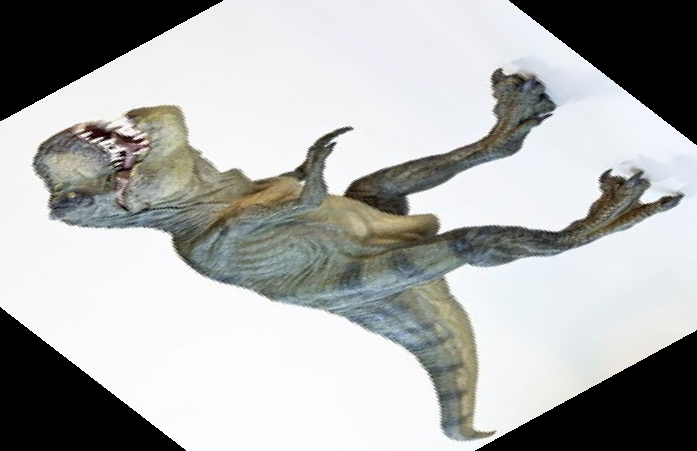

In [78]:
rotated_1 = rotation(image, 130)
cv2_imshow(rotated_1)

# Flipping (Đối xứng)
* Code sách:

In [79]:
import argparse
import cv2

def flip(image, x):
  flipped = cv2.flip(image, x)
  return flipped


Flipped Horizontally


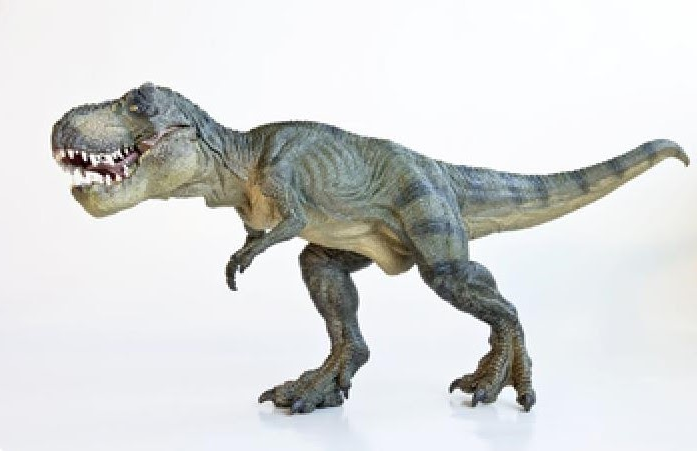

Flipped Vertically


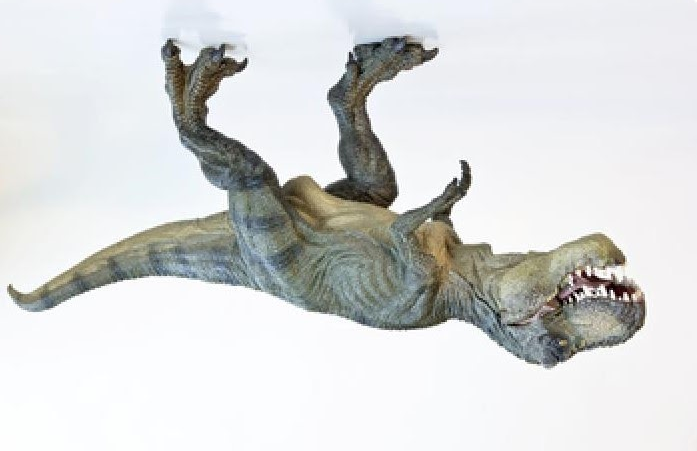

Flipped Horizontally & Vertically


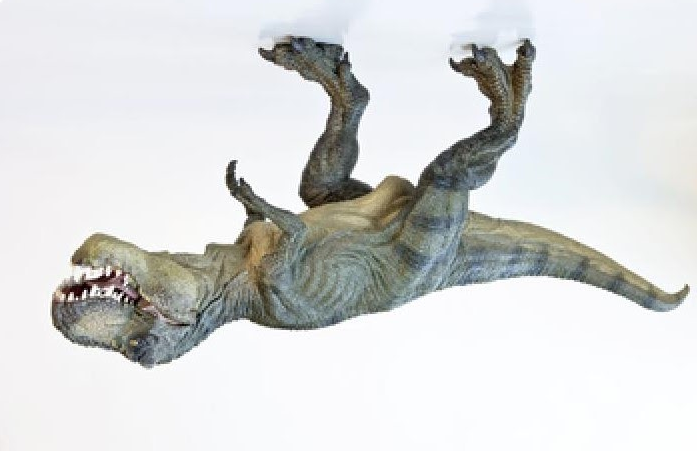

-1

In [80]:
image = cv2.imread('trex.png')
print("Flipped Horizontally")
cv2_imshow(flip(image,1))

print("Flipped Vertically")
cv2_imshow(flip(image,0))

print("Flipped Horizontally & Vertically")
cv2_imshow(flip(image,-1))
cv2.waitKey(0)

* Code ma trận: 

# Cropping
* Code sách:

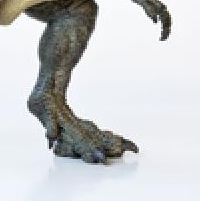

In [81]:
image = cv2.imread('trex.png')
cropped = image[250:500, 300:500]
cv2_imshow(cropped)

# Resize
* Code sách: 

In [82]:
#Hàm scale trong tài liệu
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
  dim = None
  (h, w) = image.shape[:2]

  if width is None and height is None:
    return image
  if width is None:
    r = height / float(h)
    dim = (int(w * r), height)
  else:
    r = width / float(w)
    dim = (width, int(h * r))

  resized = cv2.resize(image, dim, interpolation = inter)
  return resized

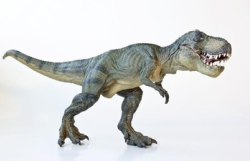

In [83]:
resized = resize(image,250,280)
cv2_imshow(resized)

# Code ma trận:

* M =[[q 0 0 ],[0 p 0],[0 0 1]]

* K = [x y 1]

* K' = [[q 0 0 ],[0 p 0],[0 0 1]] [x y 1] = [qx py 1]

In [84]:
#Hàm Scale sử dụng kiến thức về ma trận 
def scale(image,p,q):
  #Tạo ma trận lưới các điểm trong ảnh giá trụ từ (-1:1) gốc tọa độ là tâm của ảnh
  x = np.linspace(-1, 1, width)
  y = np.linspace(-1, 1, height)
  xx, yy = np.meshgrid(x, y)
  #Thêm điểm 1 vào tất cả các điểm  
  K = np.vstack([xx.flatten(), yy.flatten(), np.ones_like(xx.flatten())])
  #Tạo ma trận scale :
  M = np.asarray([[p,0,0],[0,q,0]])
  #Ta thực hiện phép nhân ma trận M và K. Sau đó resize về cùng với kích thước ảnh ban đầu
  K_phay = M @ K
  K_phay = K_phay.reshape(2, height, width)
  K_phay = np.moveaxis(K_phay, 0, -1)
  #Chuyển về gốc tọa độ về góc trên bên trái của ảnh
  x_transformed = K_phay[:,:,0:1].squeeze()
  y_transformed = K_phay[:,:,1:2].squeeze()
  x = ((x_transformed + 1.) * width) * 0.5 
  y = ((y_transformed + 1.) * height) * 0.5
  #Tìm kiếm 4 điểm xung quanh để chuẩn bị thực hiện nội suy song tuyến tham chiếu công thức tính P nội suy song tuyến.
  x0 = np.floor(x).astype(np.int64)
  x1 = x0 + 1
  y0 = np.floor(y).astype(np.int64)
  y1 = y0 + 1
  x0 = np.clip(x0, 0, width-1)
  x1 = np.clip(x1, 0, width-1)
  y0 = np.clip(y0, 0, height-1)
  y1 = np.clip(y1, 0, height-1)
  x = np.clip(x, 0, width-1)
  y = np.clip(y, 0, height-1)
  #Lấy giá trị pixel của 4 điểm
  Q1 = image[y0, x0]
  Q2 = image[y1, x0]
  Q3 = image[y0, x1]
  Q4 = image[y1, x1]

  # lấy index theo công thức
  wa = (x1-x) * (y1-y)
  wb = (x1-x) * (y-y0)
  wc = (x-x0) * (y1-y)
  wd = (x-x0) * (y-y0)

  wa = np.expand_dims(wa, axis=2)
  wb = np.expand_dims(wb, axis=2)
  wc = np.expand_dims(wc, axis=2)
  wd = np.expand_dims(wd, axis=2)

  # thực hiện biến đổi song tuyến
  p = np.asarray(wa*Q1 + wb*Q2 + wc*Q3 + wd*Q4, dtype=np.uint8)
  return p

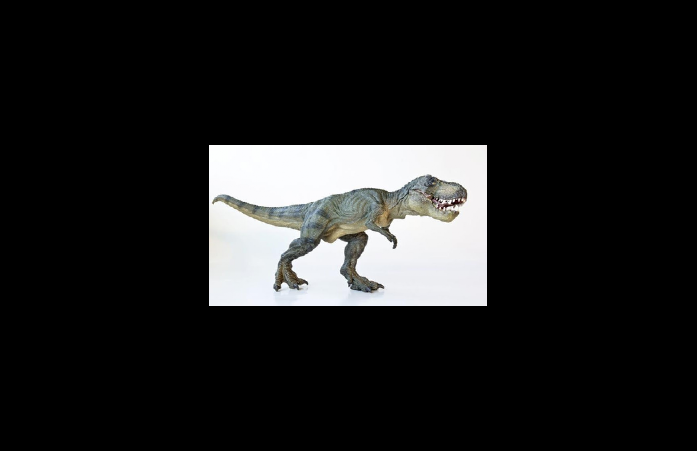

In [85]:
scaled = scale(image, 2.5, 2.8)
cv2_imshow(scaled)